
开始处理以下文件:
Train: dataset_6/train_val_data_pca-5.csv
Test: dataset_6/test_data_pca-5.csv

测试集准确率: 0.8116
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       252
           1       0.00      0.00      0.00        40

    accuracy                           0.81       292
   macro avg       0.43      0.47      0.45       292
weighted avg       0.74      0.81      0.77       292


开始处理以下文件:
Train: dataset_6/train_val_data_pca-7.csv
Test: dataset_6/test_data_pca-7.csv

测试集准确率: 0.8801
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       252
           1       0.57      0.50      0.53        40

    accuracy                           0.88       292
   macro avg       0.75      0.72      0.73       292
weighted avg       0.87      0.88      0.88       292


开始处理以下文件:
Train: dataset_6/train_val_data_pca-9.csv
Test: dataset_6/test_data_pca-9.csv

测试集准确率: 0.8870
              precision    reca

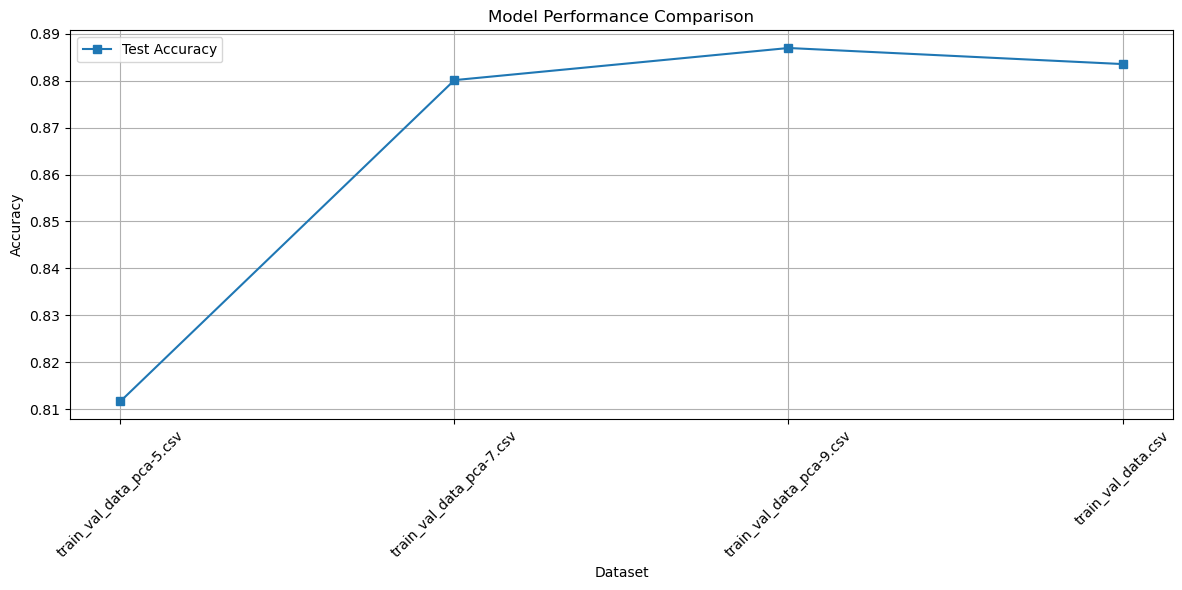

In [2]:
#dataset6
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

train_files = [
    'dataset_6/train_val_data_pca-5.csv',
    'dataset_6/train_val_data_pca-7.csv',
    'dataset_6/train_val_data_pca-9.csv',
    'dataset_6/train_val_data.csv'
]
test_files = [
    'dataset_6/test_data_pca-5.csv',
    'dataset_6/test_data_pca-7.csv',
    'dataset_6/test_data_pca-9.csv',
    'dataset_6/test_data.csv'
]

# 使用全局最优超参数
best_params = {
    'C': 95, 
    'class_weight': {0: 1, 1: 1.5}, 
    'gamma': 0.011, 
    'kernel': 'rbf'
}

results = []
for train_file, test_file in zip(train_files, test_files):
    print(f"\n开始处理以下文件:\nTrain: {train_file}\nTest: {test_file}")
    
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    
    X_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]
    X_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]
    
    # 数据标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = SVC(**best_params)
    model.fit(X_train_scaled, y_train)
    
    # 预测与准确值
    y_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'file': train_file.split('/')[-1],
        'test_accuracy': test_accuracy
    })
    
    print(f"\n测试集准确率: {test_accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# 在各个测试集上的精度对比
plt.figure(figsize=(12, 6))
x = range(len(results))
test_scores = [r['test_accuracy'] for r in results]
labels = [r['file'] for r in results]
plt.plot(x, test_scores, 's-', label='Test Accuracy')
plt.xticks(x, labels, rotation=45)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()